In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# データセットの読み込み
from sklearn.datasets import load_boston
dataset = load_boston()
x, t = dataset.data, dataset.target
columns = dataset.feature_names

In [3]:
type(x), x.shape

(numpy.ndarray, (506, 13))

In [4]:
type(t), t.shape

(numpy.ndarray, (506,))

In [5]:
#Pandas の DataFrame に変換
df = pd.DataFrame(x, columns=columns)
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [6]:
# 目標値を追加
df['Target'] = t
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [7]:
#データフレーム内の入力変数と目的変数の切り分けも行います。データフレーム内の Target が目的変数に該当し、それ以外が入力変数に該当。
#drop() を使用し、引数に設定した任意の列、行を削除。
#labels : （行、列）ラベルを指定
#axis：行方向 (axis=0) または列方向 (axis=1) を指定

# 入力変数と目的変数の切り分け
t = df['Target'].values
x = df.drop(labels=['Target'], axis=1).values

In [8]:
"""
学習用データセットとテスト用データセットに分割
ホールドアウト法 (holdout method)
scikit-learn では、データセットから指定された割合のデータをランダムに抽出して学習用データセットを作成
残りをテスト用データセットに
sklearn.model_selection.train_test_split()
"""

from sklearn.model_selection import train_test_split

In [9]:
"""
2つに分割
テスト用データセットを全体の 30% のデータを用いて作成
random_state という引数に毎回同じ整数を与えることで、乱数のシード値を固定する
"""
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [10]:
'''
重回帰分析を行う場合、LinearRegressionクラスを使用
'''
# Step 1：モデルの定義

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
'''
model を用いて学習を実行するには、fit() の引数に入力値 x と目標値 t を与える
'''
# Step 2：モデルの学習

model.fit(x_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
'''重回帰分析では、重み w とバイアス b の ２ つがパラメータ。
求まった重み w の値は model.coef_ 属性に、バイアス b の値は model.intercept_ 属性に格納
'''

#学習後のパラメータ w 
model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

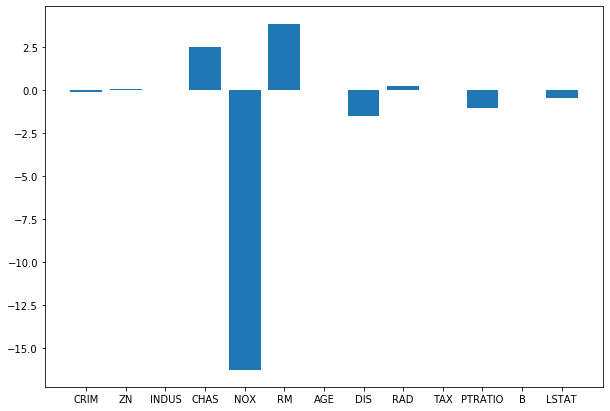

In [13]:
# パラメータの分布をヒストグラムで可視化
plt.figure(figsize=(10, 7))
plt.bar(x=columns, height=model.coef_);

In [14]:
#バイアス b
model.intercept_

37.93710774183255

In [15]:
'''
score() メソッド
決定係数 (coefficient of determination) 
'''
# Step 3：モデルの検証

print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.7645451026942549
test score :  0.6733825506400194


In [16]:
'''
新たな入力値を与えて予測値を計算させるには、predict()メソッドを用いる
'''
# 推論

y = model.predict(x_test)

In [17]:
print('予測値: ', y[0])
print('目標値: ', t_test[0])

予測値:  24.935707898576815
目標値:  22.6


*過学習を抑制するためのアプローチ
- データセットのサンプル数を増やす
- ハイパーパラメータを調整する
- 他のアルゴリズムを使用する

精度を比較する方法1
- Ridge回帰（リッジ回帰）
正則化 (regularization):正則化は目的関数に正則化項と呼ばれるモデルの複雑性に罰則（ペナルティ）を科すために追加の項を導入する手法
Ridge 回帰は重回帰分析に対して重みの2乗で表現される L2 ノルムを用いて正則化を行い、モデルの過度な複雑さに罰則を課して過学習を抑制する手法。

In [18]:
# Ridge回帰
# モデルの定義、ハイパーパラメータの値を設定
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)

In [19]:
# モデルの学習
ridge.fit(x_train, t_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [20]:
# モデルの検証
print('train score : ', ridge.score(x_train, t_train))
print('test score : ', ridge.score(x_test, t_test))

train score :  0.7623440182689594
test score :  0.6665819091486688


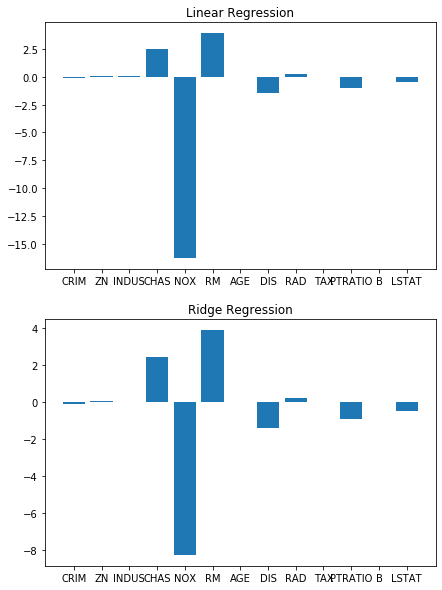

In [21]:
# 箱を準備
fig = plt.figure(figsize=(7, 10))

# 重回帰分析
ax1 = fig.add_subplot(2, 1, 1)
ax1.bar(x=columns, height=model.coef_)
ax1.set_title('Linear Regression')

# リッジ回帰
ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(x=columns, height=ridge.coef_)
ax2.set_title('Ridge Regression');

精度を比較する方法2
- Lasso回帰（ラッソ回帰）
Lasso 回帰は重回帰分析に対して、L1ノルムを使用して正則化を行う手法
Lasso 回帰の特徴として不要な入力変数を特定し、該当する重み w を 0 にする事で実質的に入力変数の種類を減らすことが出来る点あります。このとき生成される重み w のベクトル w は 0 を多く含み、これをスパース性があると表現。

In [22]:
# Lasso回帰
# モデルの定義
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)

In [23]:
# モデルの学習
lasso.fit(x_train, t_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [24]:
# モデルの検証
print('train score : ', lasso.score(x_train, t_train))
print('test score : ', lasso.score(x_test, t_test))

train score :  0.7084095500978869
test score :  0.6115433359595557


In [25]:
# 0 になっていない特徴量の数
print('元の特徴量の数 : ', x.shape[1])
print('Lasso の特徴量 : ', np.sum(lasso.coef_ != 0))

元の特徴量の数 :  13
Lasso の特徴量 :  10


In [26]:
# アルファを変更してみる
lasso_005 = Lasso(alpha=0.05)
lasso_005.fit(x_train, t_train)

print('train score : ', lasso_005.score(x_train, t_train))
print('test score : ', lasso_005.score(x_test, t_test))

train score :  0.7548928631432029
test score :  0.6541502573235292


In [27]:
# 0 になっていない特徴量の数
print('元の特徴量の数 : ', x.shape[1])
print('Lasso005 の特徴量 : ', np.sum(lasso_005.coef_ != 0))

元の特徴量の数 :  13
Lasso005 の特徴量 :  12


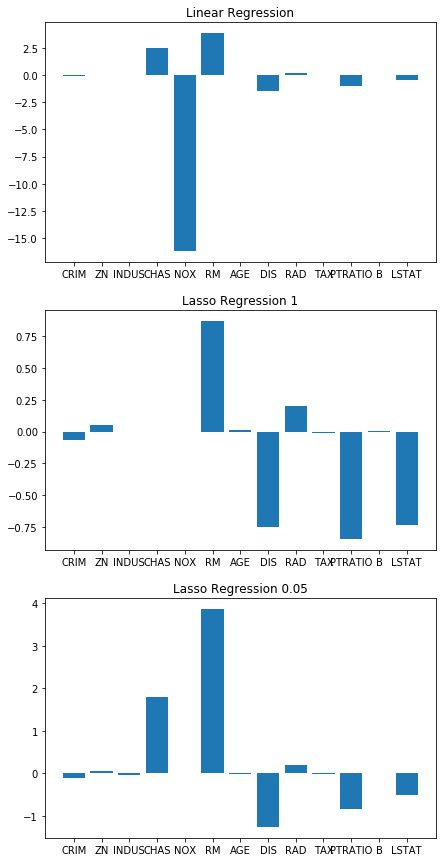

In [28]:
fig = plt.figure(figsize=(7, 15))

# 重回帰分析
ax1 = fig.add_subplot(3, 1, 1)
ax1.bar(x=columns, height=model.coef_)
ax1.set_title('Linear Regression')

# lasso
ax2 = fig.add_subplot(3, 1, 2)
ax2.bar(x=columns, height=lasso.coef_)
ax2.set_title('Lasso Regression 1')

# lasso_005
ax3 = fig.add_subplot(3, 1, 3)
ax3.bar(x=columns, height=lasso_005.coef_)
ax3.set_title('Lasso Regression 0.05');

In [29]:
# データの確認
df = pd.read_csv('regression_pls.csv')
df.head(3)

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
0,1.58,59.068,54.028,59.037114,24,0,0.213790,-0.369921,0.369921,0.213790,...,0,0,0,0,0,0,0,0,0,0
1,1.34,46.073,40.025,46.053098,20,0,-0.001725,-0.271722,0.271722,0.001725,...,0,0,0,0,0,0,0,0,0,0
2,1.22,60.052,56.020,60.021129,24,0,0.299685,-0.481433,0.481433,0.299685,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.shape

(1290, 197)

In [31]:
# データの切り分け -> ndarray に変換
x = df.drop('Target', axis=1).values
t = df['Target'].values

print(x.shape, t.shape)

(1290, 196) (1290,)


In [32]:
# 学習用データとテスト用データの分割
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

      
# モデルの定義
from sklearn.linear_model import LinearRegression
model = LinearRegression()

      
# モデルの学習
model.fit(x_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# モデルの検証
print('train : ', model.score(x_train, t_train))
print('test : ', model.score(x_test, t_test))

train :  0.9365472060103938
test :  -0.003062937082599193


過学習が起きている
多重共線性 (Multicollinearity)

In [34]:
# 相関係数の算出
df_corr = df.corr()
df_corr.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
Target,1.000000,-0.642326,-0.648078,-0.640489,-0.524453,NaN,0.111829,-0.360696,0.357026,0.113189,...,-0.032287,-0.015204,0.019244,-0.047169,NaN,0.007788,NaN,0.002448,-0.113820,0.043600
x1,-0.642326,1.000000,0.997571,0.999978,0.908895,NaN,0.322508,-0.117193,0.134074,0.298204,...,0.051291,0.186110,0.027947,-0.002219,NaN,0.001304,NaN,-0.015226,-0.038657,0.027857
x2,-0.648078,0.997571,1.000000,0.997252,0.883891,NaN,0.322631,-0.097297,0.115794,0.294947,...,0.047416,0.191792,0.029659,-0.007914,NaN,0.005912,NaN,-0.015106,-0.062823,0.027773
x3,-0.640489,0.999978,0.997252,1.000000,0.910855,NaN,0.324352,-0.120477,0.137237,0.300415,...,0.051542,0.186772,0.028046,-0.002001,NaN,0.001447,NaN,-0.015093,-0.038138,0.028359
x4,-0.524453,0.908895,0.883891,0.910855,1.000000,NaN,0.385792,-0.284647,0.293981,0.382603,...,0.044125,0.174983,0.022996,0.018780,NaN,-0.010834,NaN,-0.016378,0.027813,0.055553


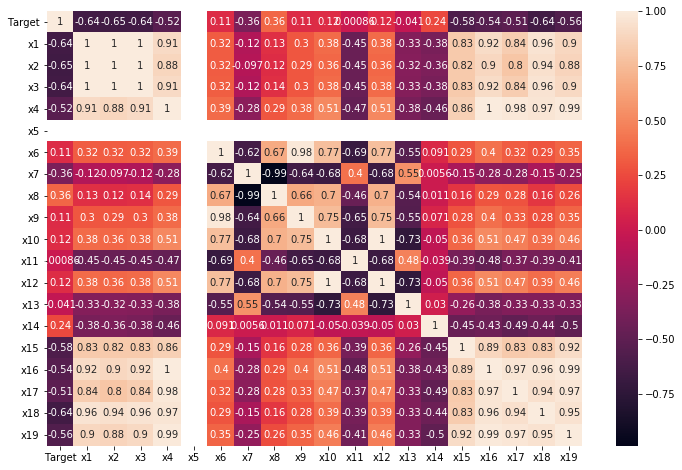

In [35]:
'''
seabornによるヒートマップの作成
seaborn.heatmap()メソッドを使用
'''
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.iloc[:20, :20], annot=True);

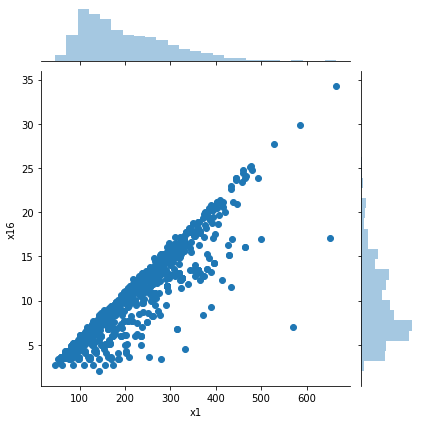

In [36]:
#相関係数の高い部分の可視化
sns.jointplot(x='x1', y='x16', data=df);

Partial Least Squares (PLS)
多重共線性の問題の対処法としてのアルゴリズム
1. 入力値と目標値の共分散が最大になるように主成分を抽出
2. 抽出された主成分に対して重回帰分析を用いてモデルの学習を行う

In [37]:
# モデルの定義
# 引数 n_componentsで落とし込む次元数を決定

from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=7)

In [38]:
# モデルの学習
pls.fit(x_train, t_train)

PLSRegression(copy=True, max_iter=500, n_components=7, scale=True, tol=1e-06)

In [39]:
# モデルの検証
print('train score : ', pls.score(x_train, t_train))
print('test score : ', pls.score(x_test, t_test))

train score :  0.906376310202351
test score :  0.7387281471807327


PLSによる多重共線性の解消を緩和